## Use ROC to identify best performing Model
- In this exercise, we are looking to characterize the performances of different detectors using the ROC curve.
- The detection_files folder contains the probability that the detector labelled the data as 1 and the actual label. 
- A perfect detector would then have the same value for the probability as the label.

In [1]:
# Import necessary libraries
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

# Import all the files in the detection_files folder
files = glob.glob('detection_files\*_det.txt')
d = {}
label = []

# Store all the files in a dictionary wich will contain FPR, Recall, AUC, and Data contained in the files
for i, file in enumerate(files):
    d[file] = {'FPR' : [], 'Recall' : [], 'AUC' : 0, 'Data' : np.loadtxt(file)}
    label.append(os.path.basename(file))
    print(label[i])
    print(d[file])

FRCNN_det.txt
{'FPR': [], 'Recall': [], 'AUC': 0, 'Data': array([[0.999785, 1.      ],
       [0.999759, 1.      ],
       [0.147354, 0.      ],
       ...,
       [0.999647, 1.      ],
       [0.999839, 1.      ],
       [0.999881, 1.      ]])}
HeadHunter-DPM_det.txt
{'FPR': [], 'Recall': [], 'AUC': 0, 'Data': array([[0.98149506, 1.        ],
       [0.8009394 , 1.        ],
       [0.98945327, 1.        ],
       ...,
       [0.97069804, 1.        ],
       [0.966399  , 1.        ],
       [0.97670077, 1.        ]])}
PVA_det.txt
{'FPR': [], 'Recall': [], 'AUC': 0, 'Data': array([[0.      , 1.      ],
       [0.99827 , 0.      ],
       [0.999426, 1.      ],
       ...,
       [0.169376, 0.      ],
       [0.999034, 1.      ],
       [0.999674, 1.      ]])}
RFCN-101_det.txt
{'FPR': [], 'Recall': [], 'AUC': 0, 'Data': array([[0.      , 1.      ],
       [0.999807, 0.      ],
       [0.999566, 1.      ],
       ...,
       [0.999571, 1.      ],
       [0.999903, 1.      ],
       [0.999

In [2]:
# Array that will store the predicted labels depending on the chosen threshold value
predicted_labels = []

for classifier in d:
    # Finding each unique value in the data and using it as a threshold
    unique_threshold = np.unique(d[classifier]['Data'][:,0])
    unique_threshold = unique_threshold[::-1] # Reverse the order to start with the highest one
    
    for index in range(len(unique_threshold)):
        # Resetting all the values to 0 foe each new threshold value
        TP = FP = FN = TN = Recall = FPR = 0
        
        # The predicted labels will take the value of 1 if the data is higher or equal than the threshold
        predicted_labels = d[classifier]['Data'][:,0] >= unique_threshold[index]
        
        # Calculating the values of the TP, FP, TN, and FN needed for the ROC curve
        TP = np.sum(np.logical_and(d[classifier]['Data'][:,1] == 1, predicted_labels == 1))
        FP = np.sum(np.logical_and(d[classifier]['Data'][:,1] == 0, predicted_labels == 1))
        TN = np.sum(np.logical_and(d[classifier]['Data'][:,1] == 0, predicted_labels == 0))
        FN = np.sum(np.logical_and(d[classifier]['Data'][:,1] == 1, predicted_labels == 0))
        
        # Calculating and adding the Recall (TPR) and FPR values to the dictionary
        d[classifier]['Recall'].append(TP/(TP+FN))
        d[classifier]['FPR'].append(FP/(FP+TN))
    
#for i, file in enumerate(files):
#    print(label[i])
#    print(d[file])

In [3]:
# Function that will draw the ROC curve for each Classifier seperately
def roc_curve(FPR, Recall):
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate or Recall')
    plt.plot(FPR, Recall, color = 'gold', label = 'ROC', linestyle = '-')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.grid(linestyle='--', linewidth=1)
    plt.legend()
    plt.show()

0.9079435250352497


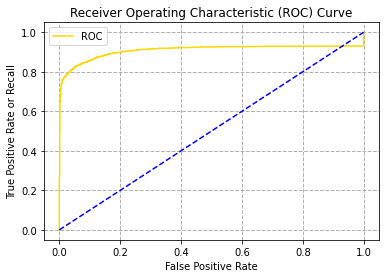



0.7364238807433657


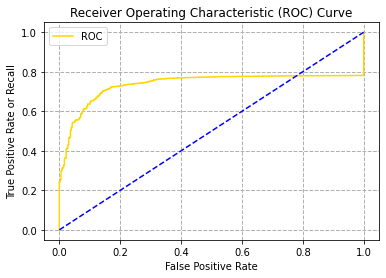



0.9026155623450585


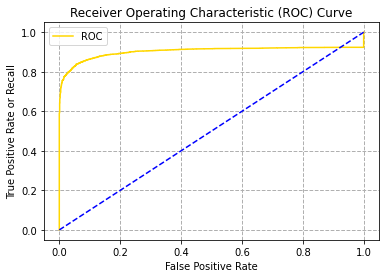



0.901305434507246


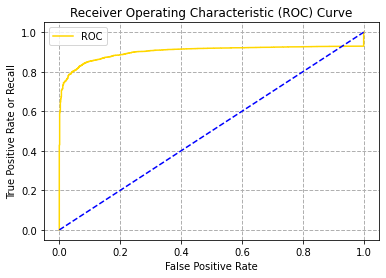



0.906228450410592


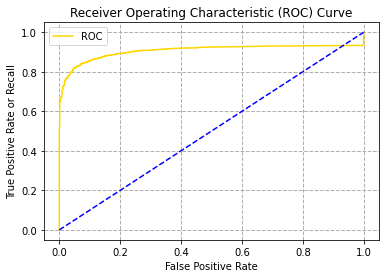



0.874026368299734


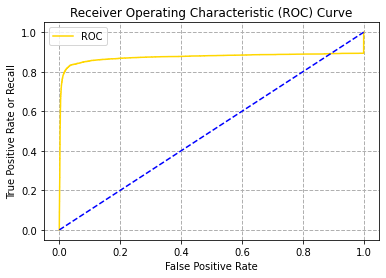



0.5995185091272327


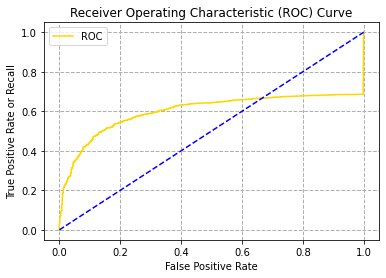

In [4]:
# Draw ROC curve for individual Classifier
for classifier in d:
    # Calculating the AUC using the trapezoid method
    d[classifier]['AUC'] = np.trapz(d[classifier]['Recall'], x = d[classifier]['FPR'])
    print(d[classifier]['AUC'])
    
    # Showing the curve for each classifier
    roc_curve(d[classifier]['FPR'], d[classifier]['Recall'])
    print('\n')

In [5]:
# Print AUC value for each file
for i, classifier in enumerate(d):
    # Calculating the AUC using the trapezoid method
    d[classifier]['AUC'] = np.trapz(d[classifier]['Recall'], x = d[classifier]['FPR'])
    print("AUC for", label[i], "is", d[classifier]['AUC'])
    

AUC for FRCNN_det.txt is 0.9079435250352497
AUC for HeadHunter-DPM_det.txt is 0.7364238807433657
AUC for PVA_det.txt is 0.9026155623450585
AUC for RFCN-101_det.txt is 0.901305434507246
AUC for RFCN-50_det.txt is 0.906228450410592
AUC for SSD_det.txt is 0.874026368299734
AUC for Viola-Jones_det.txt is 0.5995185091272327


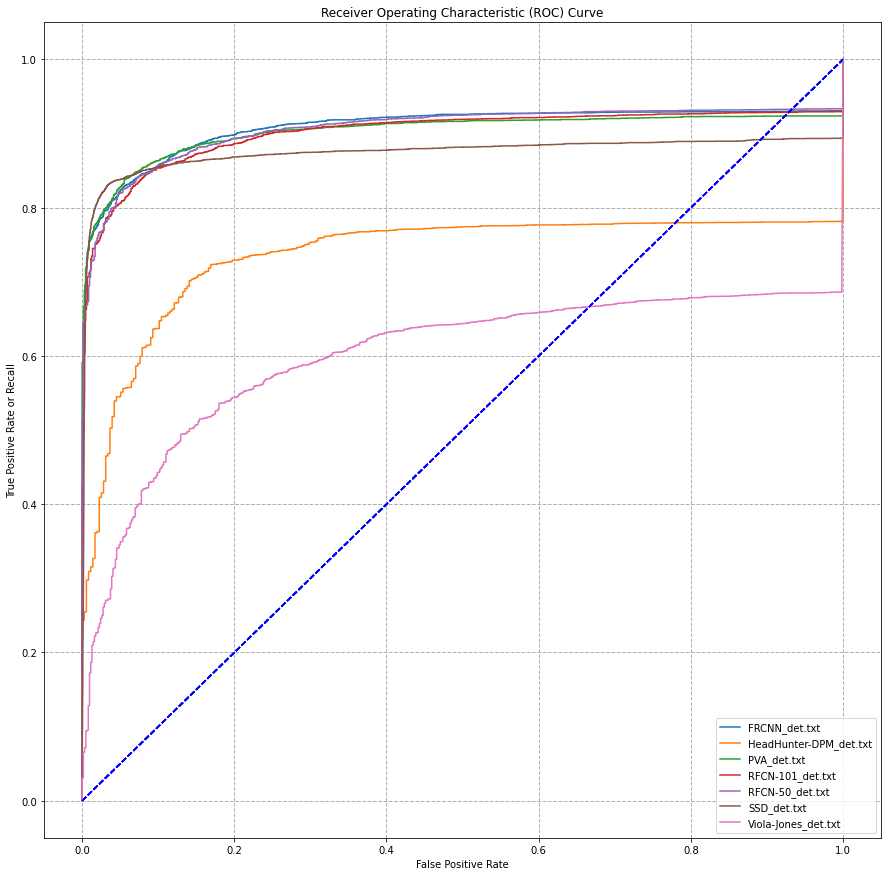

In [6]:
# Draw ROC curve for all Classifiers in same plot
plt.figure(figsize = (15,15))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate or Recall')
    
for i, classifier in enumerate(d):    
    # Showing the curve for each classifier.
    plt.plot(d[classifier]['FPR'], d[classifier]['Recall'], label = label[i], linestyle = '-')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.grid(linestyle='--', linewidth=1)
    plt.legend()

plt.show()